# Codigo de la figura 2.5: Modelo IF con avances repetidos de espigas



# 0. Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Creación de funciones


## Neuron:
Clase que representa una neurona del modelo IF con parámetros específicos.

### Métodos:
- `__init__(self, tau, threshold=None, reset_threshold=None, resting_potential=None, reset_potential=None)`: 
  Inicializa la neurona con los parámetros dados, permitiendo valores por defecto si no se proporcionan.

  Parámetros:
  - `tau`: Constante de tiempo de la membrana neuronal.
  - `threshold`: Umbral de disparo de la neurona (por defecto, infinito, sin disparo).
  - `reset_threshold`: Umbral de reinicio de la neurona (por defecto, menos infinito).
  - `resting_potential`: Potencial de reposo de la neurona.
  - `reset_potential`: Potencial de reinicio de la neurona.

### Atributos:
- `tau`: Constante de tiempo de la membrana neuronal.
- `threshold`: Umbral de disparo de la neurona.
- `reset_threshold`: Umbral de reinicio de la neurona.
- `resting_potential`: Potencial de reposo de la neurona.
- `reset_potential`: Potencial de reinicio de la neurona.
- `time_constant`: Constante de tiempo calculada a partir de `tau`.
- `potential`: Potencial de membrana actual.

### Método adicional:
- `integrate_and_fire(self, input_current, time_step, duration)`: 
  Simula la evolución temporal de la neurona en respuesta a una corriente de entrada.

  Parámetros:
  - `input_current`: Corriente de entrada.
  - `time_step`: Paso de tiempo en la simulación.
  - `duration`: Duración total de la simulación.

  Retorna:
  - `time_points`: Array de tiempos durante la simulación.
  - `membrane_potential`: Lista de potenciales de membrana a lo largo del tiempo.


In [2]:
class Neuron:
    def __init__(self, tau, threshold=None, reset_threshold=None, resting_potential=None, reset_potential=None):
        self.tau = tau
        self.threshold = threshold if threshold is not None else np.inf
        self.reset_threshold = reset_threshold if reset_threshold is not None else -np.inf
        self.resting_potential = resting_potential if resting_potential is not None else 0.0
        self.reset_potential = reset_potential if reset_potential is not None else 0.0

        self.time_constant = 1.0 / (1 - np.exp(-1.0 / tau))
        self.potential = self.resting_potential

    def integrate_and_fire(self, input_current, time_step, duration):
        time_points = np.arange(0, duration, time_step)
        membrane_potential = []

        for t in time_points:
            self.potential += (input_current - self.potential) * (1 - np.exp(-time_step / self.tau))
            membrane_potential.append(self.potential)

            if self.potential >= self.threshold:
                self.potential = self.reset_potential
            elif self.potential <= self.reset_threshold:
                self.potential = 0.0

        return time_points, membrane_potential

# 2. Variables de entorno

- `tau = 13.0`: Constante de tiempo de la membrana neuronal.
- `threshold = 0.3`: Umbral de disparo de la neurona.
- `reset_threshold = 0.0`: Umbral de reinicio de la neurona.
- `resting_potential = 0.0`: Potencial de reposo de la neurona.
- `reset_potential = 0.0`: Potencial de reinicio de la neurona.
- `corriente_entrada = 0.4`: Corriente de entrada para la simulación.
- `paso_tiempo = 0.1`: Paso de tiempo en la simulación.
- `duracion = 50.0`: Duración total de la simulación.
po.
ial v



In [4]:
tau = 13.0
threshold = 0.3
reset_threshold = 0.0
resting_potential = 0.0
reset_potential = 0.0
corriente_entrada = 0.4
paso_tiempo = 0.1
duracion = 50.0

# 3. Cálculos


## Neurona con Umbral
- `neurona_con_umbral = Neuron(tau, threshold, reset_threshold, resting_potential, reset_potential)`: 
  Se crea una instancia de la clase `Neuron` con parámetros específicos para simular una neurona con umbral.

  Resultados de la simulación:
  - `tiempos_con_umbral`: Array de tiempos durante la simulación.
  - `potencial_con_umbral`: Lista de potenciales de membrana a lo largo del tiempo.

## Neurona sin Umbral
- `neurona_sin_umbral = Neuron(tau, resting_potential=0.0)`: 
  Se crea una instancia de la clase `Neuron` con parámetros específicos para simular una neurona sin umbral.

  Resultados de la simulación:
  - `tiempos_sin_umbral`: Array de tiempos durante la simulación.
  - `potencial_sin_umbral`: Lista de potenciales de membrana a lo largo del tiempo.


In [5]:
neurona_con_umbral = Neuron(tau, threshold, reset_threshold, resting_potential, reset_potential)
tiempos_con_umbral, potencial_con_umbral = neurona_con_umbral.integrate_and_fire(corriente_entrada, paso_tiempo, duracion)

neurona_sin_umbral = Neuron(tau, resting_potential=0.0)
tiempos_sin_umbral, potencial_sin_umbral = neurona_sin_umbral.integrate_and_fire(corriente_entrada, paso_tiempo, duracion)

# 3. Dibujo de la gráfica

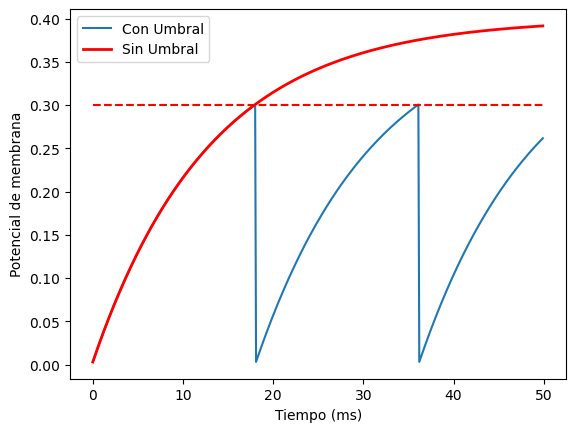

In [6]:
plt.plot(tiempos_con_umbral, potencial_con_umbral, label='Con Umbral')
plt.plot(tiempos_sin_umbral, potencial_sin_umbral, label='Sin Umbral', linewidth=2, color='red')
plt.hlines(y=0.3, xmin=0, xmax=50, color='red', linestyle='--')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Potencial de membrana')
plt.legend()
plt.show()